# **StarDist (3D)**
---

<font size = 4>**StarDist 3D** is a deep-learning method that can be used to segment cell nuclei from 3D bioimages and was first published by [Weigert *et al.* in 2019 on arXiv](https://arxiv.org/abs/1908.03636), extending to 3D the 2D appraoch from [Schmidt *et al.* in 2018](https://arxiv.org/abs/1806.03535). It uses a shape representation based on star-convex polygons for nuclei in an image to predict the presence and the shape of these nuclei. This StarDist 3D network is based on an adapted ResNet network architecture.

<font size = 4> **This particular notebook enables nuclei segmentation of 3D dataset. If you are interested in 2D dataset, you should use the StarDist 2D notebook instead.**

---
<font size = 4>*Disclaimer*:

<font size = 4>This notebook is part of the Zero-Cost Deep-Learning to Enhance Microscopy project (https://github.com/HenriquesLab/DeepLearning_Collab/wiki). Jointly developed by the Jacquemet (link to https://cellmig.org/) and Henriques (https://henriqueslab.github.io/) laboratories.

<font size = 4>This notebook is largely based on the paper:

<font size = 4>**Cell Detection with Star-convex Polygons** from Schmidt *et al.*, International Conference on Medical Image Computing and Computer-Assisted Intervention (MICCAI), Granada, Spain, September 2018. (https://arxiv.org/abs/1806.03535)

<font size = 4>and the 3D extension of the approach:

<font size = 4>**Star-convex Polyhedra for 3D Object Detection and Segmentation in Microscopy** from Weigert *et al.* published on arXiv in 2019 (https://arxiv.org/abs/1908.03636)

<font size = 4>**The Original code** is freely available in GitHub:
https://github.com/mpicbg-csbd/stardist

<font size = 4>**Please also cite this original paper when using or developing this notebook.**


# **How to use this notebook?**

---

<font size = 4>Video describing how to use our notebooks are available on youtube:
  - [**Video 1**](https://www.youtube.com/watch?v=GzD2gamVNHI&feature=youtu.be): Full run through of the workflow to obtain the notebooks and the provided test datasets as well as a common use of the notebook
  - [**Video 2**](https://www.youtube.com/watch?v=PUuQfP5SsqM&feature=youtu.be): Detailed description of the different sections of the notebook


---
###**Structure of a notebook**

<font size = 4>The notebook contains two types of cell:  

<font size = 4>**Text cells** provide information and can be modified by douple-clicking the cell. You are currently reading the text cell. You can create a new text by clicking `+ Text`.

<font size = 4>**Code cells** contain code and the code can be modfied by selecting the cell. To execute the cell, move your cursor on the `[ ]`-mark on the left side of the cell (play button appears). Click to execute the cell. After execution is done the animation of play button stops. You can create a new coding cell by clicking `+ Code`.

---
###**Table of contents, Code snippets** and **Files**

<font size = 4>On the top left side of the notebook you find three tabs which contain from top to bottom:

<font size = 4>*Table of contents* = contains structure of the notebook. Click the content to move quickly between sections.

<font size = 4>*Code snippets* = contain examples how to code certain tasks. You can ignore this when using this notebook.

<font size = 4>*Files* = contain all available files. After mounting your google drive (see section 1.) you will find your files and folders here. 

<font size = 4>**Remember that all uploaded files are purged after changing the runtime.** All files saved in Google Drive will remain. You do not need to use the Mount Drive-button; your Google Drive is connected in section 1.2.

<font size = 4>**Note:** The "sample data" in "Files" contains default files. Do not upload anything in here!

---
###**Making changes to the notebook**

<font size = 4>**You can make a copy** of the notebook and save it to your Google Drive. To do this click file -> save a copy in drive.

<font size = 4>To **edit a cell**, double click on the text. This will show you either the source code (in code cells) or the source text (in text cells).
You can use the `#`-mark in code cells to comment out parts of the code. This allows you to keep the original code piece in the cell as a comment.

#**0. Before getting started**
---
<font size = 4> For StarDist to train, **it needs to have access to a paired training dataset made of images of nuclei and their corresponding masks**. Information on how to generate a training dataset is available in our Wiki page: https://github.com/HenriquesLab/ZeroCostDL4Mic/wiki

<font size = 4>**We strongly recommend that you generate extra paired images. These images can be used to assess the quality of your trained model (Quality control dataset)**. The quality control assessment can be done directly in this notebook.

<font size = 4>The data structure is important. It is necessary that all the input data are in the same folder and that all the output data is in a separate folder. The provided training dataset is already split in two folders called "Training - Images" (Training_source) and "Training - Masks" (Training_target).

<font size = 4>Additionally, the corresponding Training_source and Training_target files need to have **the same name**.

<font size = 4>Please note that you currently can **only use .tif files!**

<font size = 4>You can also provide a folder that contains the data that you wish to analyse with the trained network once all training has been performed.

<font size = 4>Here's a common data structure that can work:
*   Experiment A
    - **Training dataset**
      - Images of nuclei (Training_source)
        - img_1.tif, img_2.tif, ...
      - Masks (Training_target)
        - img_1.tif, img_2.tif, ...
    - **Quality control dataset**
     - Images of nuclei
        - img_1.tif, img_2.tif
      - **Masks** 
        - img_1.tif, img_2.tif
    - **Data to be predicted**
    - **Results**

---
<font size = 4>**Important note**

<font size = 4>- If you wish to **Train a network from scratch** using your own dataset (and we encourage everyone to do that), you will need to run **sections 1 - 4**, then use **section 5** to assess the quality of your model and **section 6** to run predictions using the model that you trained.

<font size = 4>- If you wish to **Evaluate your model** using a model previously generated and saved on your Google Drive, you will only need to run **sections 1 and 2** to set up the notebook, then use **section 5** to assess the quality of your model.

<font size = 4>- If you only wish to **run predictions** using a model previously generated and saved on your Google Drive, you will only need to run **sections 1 and 2** to set up the notebook, then use **section 6** to run the predictions on the desired model.
---

# **1. Install StarDist and dependencies**
---


## **1.1 Install StarDist**
---


In [6]:
#@markdown ##Install StarDist and dependencies

!pip install tifffile # contains tools to operate tiff-files
!pip install csbdeep  # contains tools for restoration of fluorescence microcopy images (Content-aware Image Restoration, CARE). It uses Keras and Tensorflow.
!pip install -e git://github.com/stardist/stardist.git@0.6.2#egg=stardist
!pip install gputools
#!pip install edt
!pip install wget
!pip install fpdf

#Force session restart
exit(0)


ERROR: Invalid requirement: '#'
ERROR: Invalid requirement: '#'


Obtaining stardist from git+git://github.com/stardist/stardist.git@0.6.2#egg=stardist

  Running command git fetch -q --tags
  Running command git reset --hard -q 810dec4727e8e8bf05bd9620f91a3a0dd70de289



  Updating c:\src\stardist clone (to revision 0.6.2)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
    Preparing wheel metadata: started
    Preparing wheel metadata: finished with status 'done'
  Attempting uninstall: stardist
    Found existing installation: stardist 0.6.2
    Uninstalling stardist-0.6.2:
      Successfully uninstalled stardist-0.6.2
  Running setup.py develop for stardist


## **1.2. Restart your runtime**
---
<font size = 4>


**<font size = 4> Ignore the following message error message. Your Runtime has automatically restarted. This is normal.**

<img width="40%" alt ="" src="https://github.com/HenriquesLab/ZeroCostDL4Mic/raw/master/Wiki_files/session_crash.png"><figcaption>  </figcaption>




## **1.3. Load key dependencies**
---
<font size = 4> 

In [6]:
#@markdown ##Load key dependencies
from __future__ import print_function, unicode_literals, absolute_import, division
Notebook_version = '1.13'
Network = 'StarDist 3D'

from builtins import any as b_any

def get_requirements_path():
    # Store requirements file in 'contents' directory 
    current_dir = os.getcwd()
    dir_count = current_dir.count('/') - 1
    path = '../' * (dir_count) + 'requirements.txt'
    return path

def filter_files(file_list, filter_list):
    filtered_list = []
    for fname in file_list:
        if b_any(fname.split('==')[0] in s for s in filter_list):
            filtered_list.append(fname)
    return filtered_list

def build_requirements_file(before, after):
    path = get_requirements_path()

    # Exporting requirements.txt for local run
    !pip freeze > $path

    # Get minimum requirements file
    df = pd.read_csv(path, delimiter = "\n")
    mod_list = [m.split('.')[0] for m in after if not m in before]
    req_list_temp = df.values.tolist()
    req_list = [x[0] for x in req_list_temp]

    # Replace with package name and handle cases where import name is different to module name
    mod_name_list = [['sklearn', 'scikit-learn'], ['skimage', 'scikit-image']]
    mod_replace_list = [[x[1] for x in mod_name_list] if s in [x[0] for x in mod_name_list] else s for s in mod_list] 
    filtered_list = filter_files(req_list, mod_replace_list)

    file=open(path,'w')
    for item in filtered_list:
        file.writelines(item + '\n')

    file.close()

import sys
before = [str(m) for m in sys.modules]

# %tensorflow_version 1.x
import tensorflow
print(tensorflow.__version__)
print("Tensorflow enabled.")

# ------- Variable specific to Stardist -------
from stardist import fill_label_holes, random_label_cmap, calculate_extents, gputools_available
from stardist.models import Config3D, StarDist3D, StarDistData3D
from stardist import relabel_image_stardist3D, Rays_GoldenSpiral, calculate_extents
from stardist.matching import matching_dataset
from csbdeep.utils import Path, normalize, download_and_extract_zip_file, plot_history # for loss plot
from csbdeep.io import save_tiff_imagej_compatible
import numpy as np
np.random.seed(42)
lbl_cmap = random_label_cmap()
#from __future__ import print_function, unicode_literals, absolute_import, division
import cv2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# ------- Common variable to all ZeroCostDL4Mic notebooks -------
import numpy as np
from matplotlib import pyplot as plt
import urllib
import os, random
import shutil 
import zipfile
from tifffile import imread, imsave
import time
import sys
import wget
from pathlib import Path
import pandas as pd
import csv
from glob import glob
from scipy import signal
from scipy import ndimage
from skimage import io
from sklearn.linear_model import LinearRegression
from skimage.util import img_as_uint
import matplotlib as mpl
from skimage.metrics import structural_similarity
from skimage.metrics import peak_signal_noise_ratio as psnr
from astropy.visualization import simple_norm
from skimage import img_as_float32
from skimage.util import img_as_ubyte
from tqdm import tqdm 
from fpdf import FPDF, HTMLMixin
from datetime import datetime
from pip._internal.operations.freeze import freeze
import subprocess
from astropy.visualization import simple_norm


# For sliders and dropdown menu and progress bar
from ipywidgets import interact
import ipywidgets as widgets

# Colors for the warning messages
class bcolors:
  WARNING = '\033[31m'

W  = '\033[0m'  # white (normal)
R  = '\033[31m' # red

#Disable some of the tensorflow warnings
import warnings
warnings.filterwarnings("ignore")

print("Libraries installed")



# Check if this is the latest version of the notebook
All_notebook_versions = pd.read_csv("https://raw.githubusercontent.com/HenriquesLab/ZeroCostDL4Mic/master/Colab_notebooks/Latest_Notebook_versions.csv", dtype=str)
print('Notebook version: '+Notebook_version)
Latest_Notebook_version = All_notebook_versions[All_notebook_versions["Notebook"] == Network]['Version'].iloc[0]
print('Latest notebook version: '+Latest_Notebook_version)
if Notebook_version == Latest_Notebook_version:
  print("This notebook is up-to-date.")
else:
  print(bcolors.WARNING +"A new version of this notebook has been released. We recommend that you download it at https://github.com/HenriquesLab/ZeroCostDL4Mic/wiki")




def pdf_export(trained = False, augmentation = False, pretrained_model = False):
  class MyFPDF(FPDF, HTMLMixin):
    pass

  pdf = MyFPDF()
  pdf.add_page()
  pdf.set_right_margin(-1)
  pdf.set_font("Arial", size = 11, style='B') 

  
  day = datetime.now()
  datetime_str = str(day)[0:10]

  Header = 'Training report for '+Network+' model ('+model_name+')\nDate: '+datetime_str
  pdf.multi_cell(180, 5, txt = Header, align = 'L') 
    
  # add another cell 
  if trained:
    training_time = "Training time: "+str(hour)+ "hour(s) "+str(mins)+"min(s) "+str(round(sec))+"sec(s)"
    pdf.cell(190, 5, txt = training_time, ln = 1, align='L')
  pdf.ln(1)

  Header_2 = 'Information for your materials and methods:'
  pdf.cell(190, 5, txt=Header_2, ln=1, align='L')

  all_packages = ''
  for requirement in freeze(local_only=True):
    all_packages = all_packages+requirement+', '
  #print(all_packages)

  #Main Packages
  main_packages = ''
  version_numbers = []
  for name in ['tensorflow','numpy','Keras','csbdeep']:
    find_name=all_packages.find(name)
    main_packages = main_packages+all_packages[find_name:all_packages.find(',',find_name)]+', '
    #Version numbers only here:
    version_numbers.append(all_packages[find_name+len(name)+2:all_packages.find(',',find_name)])

  cuda_version = subprocess.run('nvcc --version',stdout=subprocess.PIPE, shell=True)
  cuda_version = cuda_version.stdout.decode('utf-8')
  cuda_version = cuda_version[cuda_version.find(', V')+3:-1]
  gpu_name = subprocess.run('nvidia-smi',stdout=subprocess.PIPE, shell=True)
  gpu_name = gpu_name.stdout.decode('utf-8')
  gpu_name = gpu_name[gpu_name.find('Tesla'):gpu_name.find('Tesla')+10]
  #print(cuda_version[cuda_version.find(', V')+3:-1])
  #print(gpu_name)

  shape = io.imread(Training_source+'/'+os.listdir(Training_source)[1]).shape
  dataset_size = len(os.listdir(Training_source))

  text = 'The '+Network+' model was trained from scratch for '+str(number_of_epochs)+' epochs on '+str(int(len(X)))+' paired image patches (image dimensions: '+str(shape)+', patch size: ('+str(patch_height)+','+str(patch_size)+','+str(patch_size)+')) with a batch size of '+str(batch_size)+' and a '+conf.train_dist_loss+' loss function, using the '+Network+' ZeroCostDL4Mic notebook (v '+Notebook_version[0]+') (von Chamier & Laine et al., 2020). Key python packages used include tensorflow (v '+version_numbers[0]+'), Keras (v '+version_numbers[2]+'), csbdeep (v '+version_numbers[3]+'), numpy (v '+version_numbers[1]+'), cuda (v '+cuda_version+'). The training was accelerated using a '+gpu_name+'GPU.'

  #text = 'The '+Network+' model ('+model_name+') was trained using '+str(dataset_size)+' paired images (image dimensions: '+str(shape)+') using the '+Network+' ZeroCostDL4Mic notebook (v '+Notebook_version[0]+') (von Chamier & Laine et al., 2020). Key python packages used include tensorflow (v '+version_numbers[0]+'), Keras (v '+version_numbers[2]+'), csbdeep (v '+version_numbers[3]+'), numpy (v '+version_numbers[1]+'), cuda (v '+cuda_version+'). The GPU used was a '+gpu_name+'.'

  if pretrained_model:
    text = 'The '+Network+' model was trained for '+str(number_of_epochs)+' epochs on '+str(int(len(X)))+' paired image patches (image dimensions: '+str(shape)+', patch size: ('+str(patch_height)+','+str(patch_size)+','+str(patch_size)+')) with a batch size of '+str(batch_size)+' and a '+conf.train_dist_loss+' loss function, using the '+Network+' ZeroCostDL4Mic notebook (v '+Notebook_version[0]+') (von Chamier & Laine et al., 2020). The model was retrained from a pretrained model. Key python packages used include tensorflow (v '+version_numbers[0]+'), Keras (v '+version_numbers[2]+'), csbdeep (v '+version_numbers[3]+'), numpy (v '+version_numbers[1]+'), cuda (v '+cuda_version+'). The training was accelerated using a '+gpu_name+'GPU.'

  pdf.set_font('')
  pdf.set_font_size(10.)
  pdf.multi_cell(190, 5, txt = text, align='L')
  pdf.set_font('')
  pdf.set_font('Arial', size = 10, style = 'B')
  pdf.ln(1)
  pdf.cell(28, 5, txt='Augmentation: ', ln=0)
  pdf.set_font('')
  if augmentation:
    aug_text = 'The dataset was augmented.'
  else:
    aug_text = 'No augmentation was used for training.'
  pdf.multi_cell(190, 5, txt=aug_text, align='L')
  pdf.set_font('Arial', size = 11, style = 'B')
  pdf.ln(1)
  pdf.cell(180, 5, txt = 'Parameters', align='L', ln=1)
  pdf.set_font('')
  pdf.set_font_size(10.)
  if Use_Default_Advanced_Parameters:
    pdf.cell(200, 5, txt='Default Advanced Parameters were enabled')
  pdf.cell(200, 5, txt='The following parameters were used for training:')
  pdf.ln(1)
  html = """ 
  <table width=40% style="margin-left:0px;">
    <tr>
      <th width = 50% align="left">Parameter</th>
      <th width = 50% align="left">Value</th>
    </tr>
    <tr>
      <td width = 50%>number_of_epochs</td>
      <td width = 50%>{0}</td>
    </tr>
    <tr>
      <td width = 50%>patch_size</td>
      <td width = 50%>{1}</td>
    </tr>
    <tr>
      <td width = 50%>batch_size</td>
      <td width = 50%>{2}</td>
    </tr>
    <tr>
      <td width = 50%>number_of_steps</td>
      <td width = 50%>{3}</td>
    </tr>
    <tr>
      <td width = 50%>percentage_validation</td>
      <td width = 50%>{4}</td>
    </tr>
      <tr>
      <td width = 50%>n_rays</td>
      <td width = 50%>{5}</td>
    </tr>
    <tr>
      <td width = 50%>initial_learning_rate</td>
      <td width = 50%>{6}</td>
    </tr>
  </table>
  """.format(number_of_epochs,str(patch_height)+'x'+str(patch_size)+'x'+str(patch_size),batch_size,number_of_steps,percentage_validation,n_rays,initial_learning_rate)
  pdf.write_html(html)

  #pdf.multi_cell(190, 5, txt = text_2, align='L')
  pdf.set_font("Arial", size = 11, style='B')
  pdf.ln(1)
  pdf.cell(190, 5, txt = 'Training Dataset', align='L', ln=1)
  pdf.set_font('')
  pdf.set_font('Arial', size = 10, style = 'B')
  pdf.cell(30, 5, txt= 'Training_source:', align = 'L', ln=0)
  pdf.set_font('')
  pdf.multi_cell(170, 5, txt = Training_source, align = 'L')
  pdf.set_font('')
  pdf.set_font('Arial', size = 10, style = 'B')
  pdf.cell(28, 5, txt= 'Training_target:', align = 'L', ln=0)
  pdf.set_font('')
  pdf.multi_cell(170, 5, txt = Training_target, align = 'L')
  #pdf.cell(190, 5, txt=aug_text, align='L', ln=1)
  pdf.ln(1)
  pdf.set_font('')
  pdf.set_font('Arial', size = 10, style = 'B')
  pdf.cell(21, 5, txt= 'Model Path:', align = 'L', ln=0)
  pdf.set_font('')
  pdf.multi_cell(170, 5, txt = model_path+'/'+model_name, align = 'L')
  pdf.ln(1)
  pdf.cell(60, 5, txt = 'Example Training pair', ln=1)
  pdf.ln(1)
  exp_size = io.imread('/content/TrainingDataExample_StarDist3D.png').shape
  pdf.image('/content/TrainingDataExample_StarDist3D.png', x = 11, y = None, w = round(exp_size[1]/8), h = round(exp_size[0]/8))
  pdf.ln(1)
  ref_1 = 'References:\n - ZeroCostDL4Mic: von Chamier, Lucas & Laine, Romain, et al. "Democratising deep learning for microscopy with ZeroCostDL4Mic." Nature Communications (2021).'
  pdf.multi_cell(190, 5, txt = ref_1, align='L')
  ref_2 = '- StarDist 3D: Schmidt, Uwe, et al. "Cell detection with star-convex polygons." International Conference on Medical Image Computing and Computer-Assisted Intervention. Springer, Cham, 2018.'
  pdf.multi_cell(190, 5, txt = ref_2, align='L')
  ref_3 = '- StarDist 3D: Weigert, Martin, et al. "Star-convex polyhedra for 3d object detection and segmentation in microscopy." The IEEE Winter Conference on Applications of Computer Vision. 2020.'
  pdf.multi_cell(190, 5, txt = ref_3, align='L')
  # if Use_Data_augmentation:
  #   ref_4 = '- Augmentor: Bloice, Marcus D., Christof Stocker, and Andreas Holzinger. "Augmentor: an image augmentation library for machine learning." arXiv preprint arXiv:1708.04680 (2017).'
  #   pdf.multi_cell(190, 5, txt = ref_4, align='L')
  pdf.ln(3)
  reminder = 'Important:\nRemember to perform the quality control step on all newly trained models\nPlease consider depositing your training dataset on Zenodo'
  pdf.set_font('Arial', size = 11, style='B')
  pdf.multi_cell(190, 5, txt=reminder, align='C')

  pdf.output(model_path+'/'+model_name+'/'+model_name+"_training_report.pdf")


def qc_pdf_export():
  class MyFPDF(FPDF, HTMLMixin):
    pass

  pdf = MyFPDF()
  pdf.add_page()
  pdf.set_right_margin(-1)
  pdf.set_font("Arial", size = 11, style='B') 

  Network = 'Stardist 3D'

  day = datetime.now()
  datetime_str = str(day)[0:10]

  Header = 'Quality Control report for '+Network+' model ('+QC_model_name+')\nDate: '+datetime_str
  pdf.multi_cell(180, 5, txt = Header, align = 'L') 

  all_packages = ''
  for requirement in freeze(local_only=True):
    all_packages = all_packages+requirement+', '

  pdf.set_font('')
  pdf.set_font('Arial', size = 11, style = 'B')
  pdf.ln(2)
  pdf.cell(190, 5, txt = 'Development of Training Losses', ln=1, align='L')
  pdf.ln(1)
  exp_size = io.imread(full_QC_model_path+'/Quality Control/lossCurvePlots.png').shape
  if os.path.exists(full_QC_model_path+'/Quality Control/lossCurvePlots.png'):
    pdf.image(full_QC_model_path+'/Quality Control/lossCurvePlots.png', x = 11, y = None, w = round(exp_size[1]/8), h = round(exp_size[0]/8))
  else:
    pdf.set_font('')
    pdf.set_font('Arial', size=10)
    pdf.multi_cell(190, 5, txt='If you would like to see the evolution of the loss function during training please play the first cell of the QC section in the notebook.')
  pdf.ln(2)
  pdf.set_font('')
  pdf.set_font('Arial', size = 10, style = 'B')
  pdf.ln(3)
  pdf.cell(80, 5, txt = 'Example Quality Control Visualisation', ln=1)
  pdf.ln(1)
  exp_size = io.imread(full_QC_model_path+'/Quality Control/QC_example_data.png').shape
  pdf.image(full_QC_model_path+'/Quality Control/QC_example_data.png', x = 16, y = None, w = round(exp_size[1]/10), h = round(exp_size[0]/10))
  pdf.ln(1)
  pdf.set_font('')
  pdf.set_font('Arial', size = 11, style = 'B')
  pdf.ln(1)
  pdf.cell(180, 5, txt = 'Quality Control Metrics', align='L', ln=1)
  pdf.set_font('')
  pdf.set_font_size(10.)

  pdf.ln(1)
  html = """
  <body>
  <font size="10" face="Courier New" >
  <table width=50% style="margin-left:0px;">"""
  with open(full_QC_model_path+'/Quality Control/Quality_Control for '+QC_model_name+'.csv', 'r') as csvfile:
    metrics = csv.reader(csvfile)
    header = next(metrics)
    image = header[0]
    PvGT_IoU = header[1]
    header = """
    <tr>
    <th width = 50% align="center">{0}</th>
    <th width = 50% align="center">{1}</th>
    </tr>""".format(image,PvGT_IoU)
    html = html+header
    for row in metrics:
      image = row[0]
      PvGT_IoU = row[1]
      cells = """
        <tr>
          <td width = 50% align="center">{0}</td>
          <td width = 50% align="center">{1}</td>
        </tr>""".format(image,str(round(float(PvGT_IoU),3)))
      html = html+cells
    html = html+"""</body></table>"""
    
  pdf.write_html(html)

  pdf.ln(1)
  pdf.set_font('')
  pdf.set_font_size(10.)
  ref_1 = 'References:\n - ZeroCostDL4Mic: von Chamier, Lucas & Laine, Romain, et al. "Democratising deep learning for microscopy with ZeroCostDL4Mic." Nature Communications (2021).'
  pdf.multi_cell(190, 5, txt = ref_1, align='L')
  ref_2 = ' - Weigert, Martin, et al. "Star-convex polyhedra for 3d object detection and segmentation in microscopy." The IEEE Winter Conference on Applications of Computer Vision. 2020.'
  pdf.multi_cell(190, 5, txt = ref_2, align='L')

  pdf.ln(3)
  reminder = 'To find the parameters and other information about how this model was trained, go to the training_report.pdf of this model which should be in the folder of the same name.'

  pdf.set_font('Arial', size = 11, style='B')
  pdf.multi_cell(190, 5, txt=reminder, align='C')

  pdf.output(full_QC_model_path+'/Quality Control/'+QC_model_name+'_QC_report.pdf')



def random_fliprot(img, mask, axis=None): 
    if axis is None:
        axis = tuple(range(mask.ndim))
    axis = tuple(axis)
            
    assert img.ndim>=mask.ndim
    perm = tuple(np.random.permutation(axis))
    transpose_axis = np.arange(mask.ndim)
    for a, p in zip(axis, perm):
        transpose_axis[a] = p
    transpose_axis = tuple(transpose_axis)
    img = img.transpose(transpose_axis + tuple(range(mask.ndim, img.ndim))) 
    mask = mask.transpose(transpose_axis) 
    for ax in axis: 
        if np.random.rand() > 0.5:
            img = np.flip(img, axis=ax)
            mask = np.flip(mask, axis=ax)
    return img, mask 

def random_intensity_change(img):
    img = img*np.random.uniform(0.6,2) + np.random.uniform(-0.2,0.2)
    return img

def augmenter(x, y):
    """Augmentation of a single input/label image pair.
    x is an input image
    y is the corresponding ground-truth label image
    """
    # Note that we only use fliprots along axis=(1,2), i.e. the yx axis 
    # as 3D microscopy acquisitions are usually not axially symmetric
    x, y = random_fliprot(x, y, axis=(1,2))
    x = random_intensity_change(x)
    return x, y

# Build requirements file for local run
after = [str(m) for m in sys.modules]
build_requirements_file(before, after)

2.6.0
Tensorflow enabled.
Libraries installed
Notebook version: 1.13
Latest notebook version: 1.13
This notebook is up-to-date.


# **2. Initialise the Colab session**




---







## **2.1. Check for GPU access**
---

By default, the session should be using Python 3 and GPU acceleration, but it is possible to ensure that these are set properly by doing the following:

<font size = 4>Go to **Runtime -> Change the Runtime type**

<font size = 4>**Runtime type: Python 3** *(Python 3 is programming language in which this program is written)*

<font size = 4>**Accelerator: GPU** *(Graphics processing unit)*


In [7]:
#@markdown ##Run this cell to check if you have GPU access
# %tensorflow_version 1.x


import tensorflow as tf
if tf.test.gpu_device_name()=='':
  print('You do not have GPU access.') 
  print('Did you change your runtime ?') 
  print('If the runtime setting is correct then Google did not allocate a GPU for your session')
  print('Expect slow performance. To access GPU try reconnecting later')

else:
  print('You have GPU access')
  !nvidia-smi

You have GPU access
Wed Sep 15 16:56:00 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 471.68       Driver Version: 471.68       CUDA Version: 11.4     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Quadro P2000       WDDM  | 00000000:9E:00.0  On |                  N/A |
| 47%   37C    P0    18W /  75W |   1449MiB /  5120MiB |      1%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                    

## **2.2. Mount your Google Drive**
---
<font size = 4> To use this notebook on the data present in your Google Drive, you need to mount your Google Drive to this notebook.

<font size = 4> Play the cell below to mount your Google Drive and follow the link. In the new browser window, select your drive and select 'Allow', copy the code, paste into the cell and press enter. This will give Colab access to the data on the drive. 

<font size = 4> Once this is done, your data are available in the **Files** tab on the top left of notebook.

In [ ]:
#@markdown ##Play the cell to connect your Google Drive to Colab

#@markdown * Click on the URL. 

#@markdown * Sign in your Google Account. 

#@markdown * Copy the authorization code. 

#@markdown * Enter the authorization code. 

#@markdown * Click on "Files" site on the right. Refresh the site. Your Google Drive folder should now be available here as "drive". 

# mount user's Google Drive to Google Colab.
from google.colab import drive
drive.mount('/content/gdrive')

**<font size = 4> If you cannot see your files, reactivate your session by connecting to your hosted runtime.** 


<img width="40%" alt ="Example of image detection with retinanet." src="https://github.com/HenriquesLab/ZeroCostDL4Mic/raw/master/Wiki_files/connect_to_hosted.png"><figcaption> Connect to a hosted runtime. </figcaption>

# **3. Select your parameters and paths**
---

## **3.1. Setting main training parameters**
---
<font size = 4> 

<font size = 5> **Paths for training, predictions and results**

<font size = 4>**`Training_source:`, `Training_target`:** These are the paths to your folders containing the Training_source (images of nuclei) and Training_target (masks) training data respecively. To find the paths of the folders containing the respective datasets, go to your Files on the left of the notebook, navigate to the folder containing your files and copy the path by right-clicking on the folder, **Copy path** and pasting it into the right box below.

<font size = 4>**`model_name`:** Use only my_model -style, not my-model (Use "_" not "-"). Do not use spaces in the name. Avoid using the name of an existing model (saved in the same folder) as it will be overwritten.

<font size = 4>**`model_path`**: Enter the path where your model will be saved once trained (for instance your result folder).

<font size = 5>**Training parameters**

<font size = 4>**`number_of_epochs`:** Input how many epochs (rounds) the network will be trained. Preliminary results can already be observed after a 200 epochs, but a full training should run for more. Evaluate the performance after training (see 5.). **Default value: 200**

<font size = 5>**Advanced parameters - experienced users only**

<font size =4>**`batch_size:`** This parameter defines the number of patches seen in each training step. Reducing or increasing the **batch size** may slow or speed up your training, respectively, and can influence network performance. **Default value: 1** 

<font size = 4>**`number_of_steps`:** Define the number of training steps by epoch. By default (or if set to 0) this parameter is calculated so that each image / patch is seen at least once per epoch. **Default value: Number of patch / batch_size**. This value is multiplied by 6 when augmentation is enabled.

<font size = 4>**`patch_size`:** and **`patch_height`:** Input the size of the patches use to train StarDist 3D (length of a side). The value should be smaller or equal to the dimensions of the image. Make patch size and patch_height as large as possible and divisible by 8 and 4, respectively. **Default value: dimension of the training images**

<font size = 4>**`percentage_validation`:**  Input the percentage of your training dataset you want to use to validate the network during the training. **Default value: 10** 

<font size = 4>**`n_rays`:** Set number of rays (corners) used for StarDist (for instance a cube has 8 corners). **Default value: 96** 

<font size = 4>**`initial_learning_rate`:** Input the initial value to be used as learning rate. **Default value: 0.0003**

<font size = 4>**If you get an Out of memory (OOM) error during the training,  manually decrease the patch_size and  patch_height values until the OOM error disappear.**

Default advanced parameters enabled
Image dimensions (z,y,x) (22, 512, 512)
 Your chosen patch_height is bigger than the z dimension of your image; therefore the patch_size chosen is now: 22
 Your chosen patch_height is not divisible by 4; therefore the patch_size chosen is now: 16
Parameters initiated.


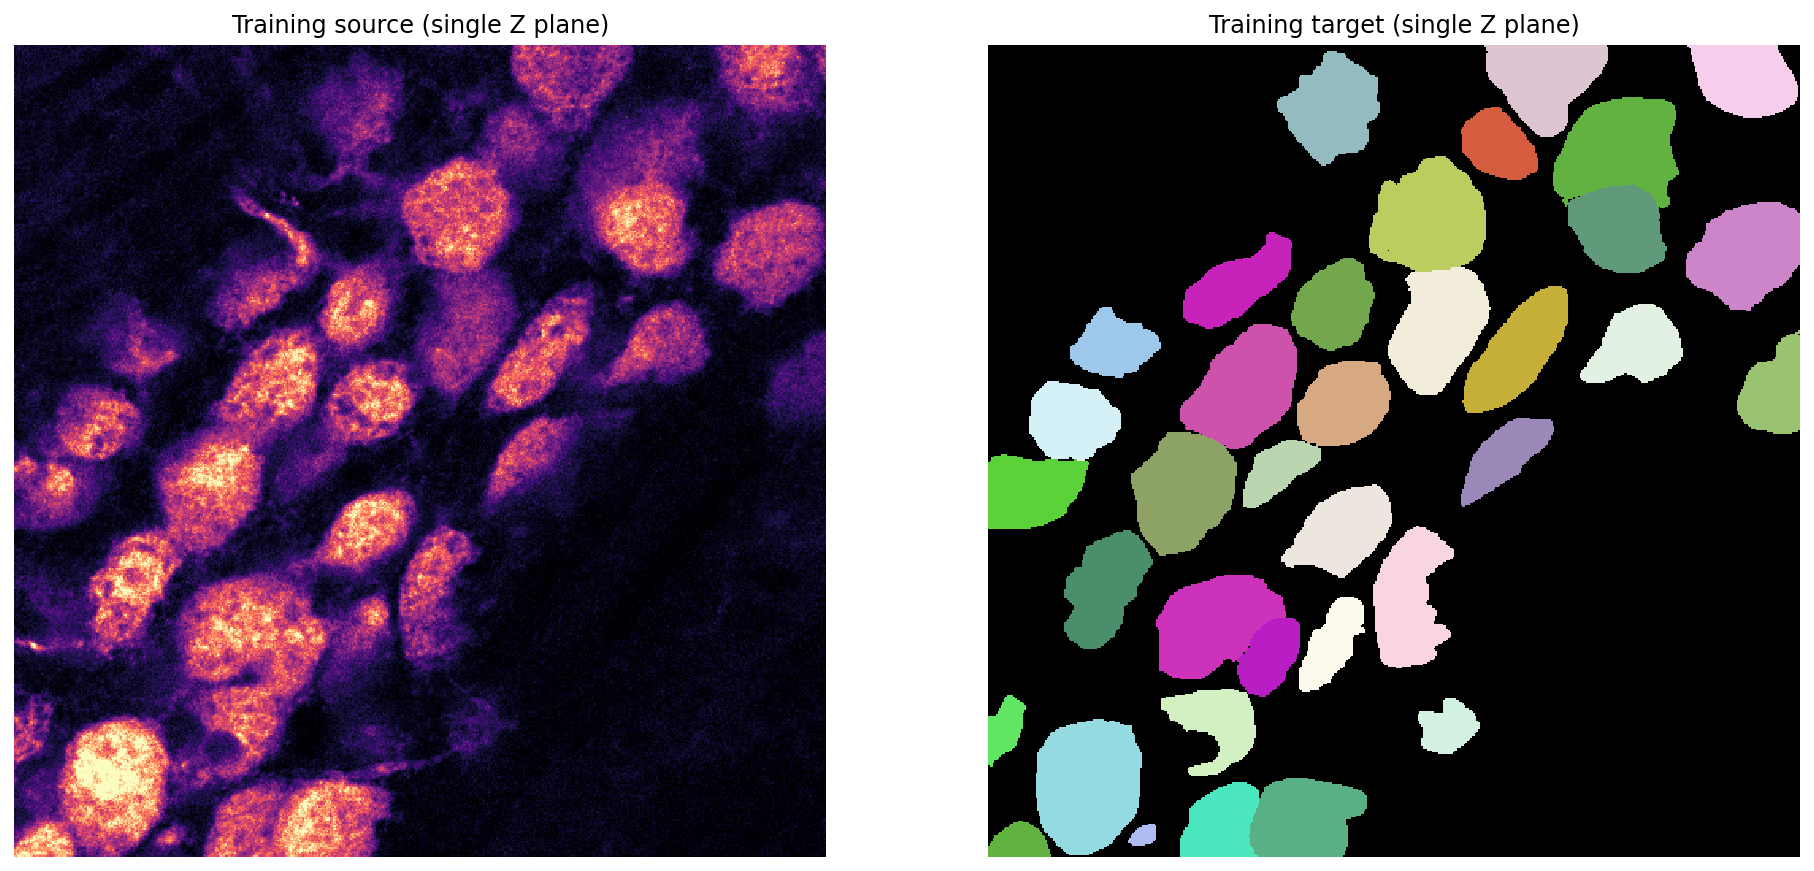

In [8]:


#@markdown ###Path to training images: 
Training_source = "C:\\Users\\fallest\\Documents\\Projects\\Alvaro_StarDist_3D\\DataSet\\Training_dataset\\Training_Source" #@param {type:"string"}
training_images = Training_source


Training_target = "C:\\Users\\fallest\\Documents\\Projects\\Alvaro_StarDist_3D\\DataSet\\Training_dataset\\Masks" #@param {type:"string"}
mask_images = Training_target 


#@markdown ###Name of the model and path to model folder:
model_name = "Alvaro_Cells_3D" #@param {type:"string"}

model_path = "C:\\Users\\fallest\\Documents\\Projects\\Alvaro_StarDist_3D\\model_sept_15_2021" #@param {type:"string"}
trained_model = model_path 

#@markdown ### Other parameters for training:
number_of_epochs =  200#@param {type:"number"}

#@markdown ###Advanced Parameters
Use_Default_Advanced_Parameters = True #@param {type:"boolean"}

#@markdown ###If not, please input:

#GPU_limit = 90 #@param {type:"number"}
batch_size =  2#@param {type:"number"}
number_of_steps = 0#@param {type:"number"}
patch_size =  96#@param {type:"number"} # pixels in
patch_height =  48#@param {type:"number"}
percentage_validation =   10#@param {type:"number"}
n_rays = 96 #@param {type:"number"}
initial_learning_rate = 0.0003 #@param {type:"number"}

if (Use_Default_Advanced_Parameters): 
  print("Default advanced parameters enabled")
  batch_size = 2 # default from original author's notebook
  n_rays = 96
  percentage_validation = 10
  initial_learning_rate = 0.0003

  patch_size =  96 # default from original author's notebook
  patch_height =  48 # default from original author's notebook


percentage = percentage_validation/100

#here we check that no model with the same name already exist, if so print a warning

if os.path.exists(model_path+'/'+model_name):
  print(bcolors.WARNING +"!! WARNING: "+model_name+" already exists and will be deleted in the following cell !!")
  print(bcolors.WARNING +"To continue training "+model_name+", choose a new model_name here, and load "+model_name+" in section 3.3"+W)
   

random_choice=random.choice(os.listdir(Training_source))
x = imread(Training_source+"/"+random_choice)

# Here we check that the input images are stacks
if len(x.shape) == 3:
  print("Image dimensions (z,y,x)",x.shape)

if not len(x.shape) == 3:
  print(bcolors.WARNING +"Your images appear to have the wrong dimensions. Image dimension",x.shape)


#Find image Z dimension and select the mid-plane
Image_Z = x.shape[0]
mid_plane = int(Image_Z / 2)+1


#Find image XY dimension
Image_Y = x.shape[1]
Image_X = x.shape[2]

# If default parameters, patch size is the same as image size
# if (Use_Default_Advanced_Parameters): 
#   patch_size = min(Image_Y, Image_X) 
#   patch_height = Image_Z

#Hyperparameters failsafes

# Here we check that patch_size is smaller than the smallest xy dimension of the image 

if patch_size > min(Image_Y, Image_X):
  patch_size = min(Image_Y, Image_X)
  print (bcolors.WARNING + " Your chosen patch_size is bigger than the xy dimension of your image; therefore the patch_size chosen is now:",patch_size)

# Here we check that patch_size is divisible by 8
if not patch_size % 8 == 0:
    patch_size = ((int(patch_size / 8)-1) * 8)
    print (bcolors.WARNING + " Your chosen patch_size is not divisible by 8; therefore the patch_size chosen is now:",patch_size)

# Here we check that patch_height is smaller than the z dimension of the image 

if patch_height > Image_Z :
  patch_height = Image_Z
  print (bcolors.WARNING + " Your chosen patch_height is bigger than the z dimension of your image; therefore the patch_size chosen is now:",patch_height)

# Here we check that patch_height is divisible by 4
if not patch_height % 4 == 0:
    patch_height = ((int(patch_height / 4)-1) * 4)
    if patch_height == 0:
      patch_height = 4
    print (bcolors.WARNING + " Your chosen patch_height is not divisible by 4; therefore the patch_size chosen is now:",patch_height)

# Here we disable pre-trained model by default (in case the next cell is not ran)
Use_pretrained_model = False

# Here we disable data augmentation by default (in case the cell is not ran)

Use_Data_augmentation = False

print("Parameters initiated.")


os.chdir(Training_target)
y = imread(Training_target+"/"+random_choice)

#Here we use a simple normalisation strategy to visualise the image
from astropy.visualization import simple_norm
norm = simple_norm(x, percent = 99)

mid_plane = int(Image_Z / 2)+1

f=plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.imshow(x[mid_plane], interpolation='nearest', norm=norm, cmap='magma')
plt.axis('off')
plt.title('Training source (single Z plane)');
plt.subplot(1,2,2)
plt.imshow(y[mid_plane], interpolation='nearest', cmap=lbl_cmap)
plt.axis('off')
plt.title('Training target (single Z plane)');
plt.savefig('/content/TrainingDataExample_StarDist3D.png',bbox_inches='tight',pad_inches=0)

## **3.2. Data augmentation**
---
<font size = 4>

<font size = 4>Data augmentation can improve training progress by amplifying differences in the dataset. This can be useful if the available dataset is small since, in this case, it is possible that a network could quickly learn every example in the dataset (overfitting), without augmentation. Augmentation is not necessary for training and if your training dataset is large you should disable it.

<font size = 4><font size = 4> **However, data augmentation is not a magic solution and may also introduce issues. Therefore, we recommend that you train your network with and without augmentation, and use the QC section to validate that it improves overall performances.**  

<font size = 4>Data augmentation is performed here by flipping, rotating and modifying the intensity of the images.



In [ ]:
#Data augmentation

Use_Data_augmentation = True #@param {type:"boolean"}

if Use_Data_augmentation:
  augmenter = augmenter
  print("Data augmentation enabled. Let's flip!")
else:
  augmenter = None
  print("Data augmentation disabled.")





## **3.3. Using weights from a pre-trained model as initial weights**
---
<font size = 4>  Here, you can set the the path to a pre-trained model from which the weights can be extracted and used as a starting point for this training session. **This pre-trained model needs to be a StarDist model**. 

<font size = 4> This option allows you to perform training over multiple Colab runtimes or to do transfer learning using models trained outside of ZeroCostDL4Mic. **You do not need to run this section if you want to train a network from scratch**.

<font size = 4> In order to continue training from the point where the pre-trained model left off, it is adviseable to also **load the learning rate** that was used when the training ended. This is automatically saved for models trained with ZeroCostDL4Mic and will be loaded here. If no learning rate can be found in the model folder provided, the default learning rate will be used. 

In [ ]:
# @markdown ##Loading weights from a pre-trained network

Use_pretrained_model = False #@param {type:"boolean"}

pretrained_model_choice = "Demo_3D_Model_from_Stardist_3D_paper" #@param ["Model_from_file", "Demo_3D_Model_from_Stardist_3D_paper"]

Weights_choice = "best" #@param ["last", "best"]


#@markdown ###If you chose "Model_from_file", please provide the path to the model folder:
pretrained_model_path = "" #@param {type:"string"}

# --------------------- Check if we load a previously trained model ------------------------
if Use_pretrained_model:

# --------------------- Load the model from the choosen path ------------------------
  if pretrained_model_choice == "Model_from_file":
    h5_file_path = os.path.join(pretrained_model_path, "weights_"+Weights_choice+".h5")


# --------------------- Download the Demo 3D model provided in the Stardist 3D github ------------------------

  if pretrained_model_choice == "Demo_3D_Model_from_Stardist_3D_paper":
    pretrained_model_name = "Demo_3D"
    pretrained_model_path = "/content/"+pretrained_model_name
    print("Downloading the Demo 3D model from the Stardist_3D paper")
    if os.path.exists(pretrained_model_path):
      shutil.rmtree(pretrained_model_path)
    os.makedirs(pretrained_model_path)
    wget.download("https://raw.githubusercontent.com/mpicbg-csbd/stardist/master/models/examples/3D_demo/config.json", pretrained_model_path)
    wget.download("https://github.com/mpicbg-csbd/stardist/raw/master/models/examples/3D_demo/thresholds.json", pretrained_model_path)
    wget.download("https://github.com/mpicbg-csbd/stardist/blob/master/models/examples/3D_demo/weights_best.h5?raw=true", pretrained_model_path)
    wget.download("https://github.com/mpicbg-csbd/stardist/blob/master/models/examples/3D_demo/weights_last.h5?raw=true", pretrained_model_path)
    h5_file_path = os.path.join(pretrained_model_path, "weights_"+Weights_choice+".h5")

# --------------------- Add additional pre-trained models here ------------------------



# --------------------- Check the model exist ------------------------
# If the model path chosen does not contain a pretrain model then use_pretrained_model is disabled, 
  if not os.path.exists(h5_file_path):
    print(bcolors.WARNING+'WARNING: weights_last.h5 pretrained model does not exist'+W)
    Use_pretrained_model = False

  
# If the model path contains a pretrain model, we load the training rate, 
  if os.path.exists(h5_file_path):
#Here we check if the learning rate can be loaded from the quality control folder
    if os.path.exists(os.path.join(pretrained_model_path, 'Quality Control', 'training_evaluation.csv')):

      with open(os.path.join(pretrained_model_path, 'Quality Control', 'training_evaluation.csv'),'r') as csvfile:
        csvRead = pd.read_csv(csvfile, sep=',')
        #print(csvRead)
    
        if "learning rate" in csvRead.columns: #Here we check that the learning rate column exist (compatibility with model trained un ZeroCostDL4Mic bellow 1.4)
          print("pretrained network learning rate found")
          #find the last learning rate
          lastLearningRate = csvRead["learning rate"].iloc[-1]
          #Find the learning rate corresponding to the lowest validation loss
          min_val_loss = csvRead[csvRead['val_loss'] == min(csvRead['val_loss'])]
          #print(min_val_loss)
          bestLearningRate = min_val_loss['learning rate'].iloc[-1]

          if Weights_choice == "last":
            print('Last learning rate: '+str(lastLearningRate))

          if Weights_choice == "best":
            print('Learning rate of best validation loss: '+str(bestLearningRate))

        if not "learning rate" in csvRead.columns: #if the column does not exist, then initial learning rate is used instead
          bestLearningRate = initial_learning_rate
          lastLearningRate = initial_learning_rate
          print(bcolors.WARNING+'WARNING: The learning rate cannot be identified from the pretrained network. Default learning rate of '+str(bestLearningRate)+' will be used instead' + W)

#Compatibility with models trained outside ZeroCostDL4Mic but default learning rate will be used
    if not os.path.exists(os.path.join(pretrained_model_path, 'Quality Control', 'training_evaluation.csv')):
      print(bcolors.WARNING+'WARNING: The learning rate cannot be identified from the pretrained network. Default learning rate of '+str(initial_learning_rate)+' will be used instead'+ W)
      bestLearningRate = initial_learning_rate
      lastLearningRate = initial_learning_rate


# Display info about the pretrained model to be loaded (or not)
if Use_pretrained_model:
  print(bcolors.WARNING+'Weights found in:')
  print(h5_file_path)
  print(bcolors.WARNING+'will be loaded prior to training.')

else:
  print(bcolors.WARNING+'No pretrained network will be used.')

#**4. Train the network**
---

## **4.1. Prepare the training data and model for training**
---
<font size = 4>Here, we use the information from 3. to build the model and convert the training data into a suitable format for training.

In [9]:
#@markdown ##Create the model and dataset objects

# --------------------- Here we delete the model folder if it already exist ------------------------

if os.path.exists(model_path+'/'+model_name):
  print(bcolors.WARNING +"!! WARNING: Model folder already exists and has been removed !!" + W)
  shutil.rmtree(model_path+'/'+model_name)


import warnings
warnings.simplefilter("ignore")

# --------------------- Here we load the augmented data or the raw data ------------------------

# if Use_Data_augmentation:
#   Training_source_dir = Training_source_augmented
#   Training_target_dir = Training_target_augmented

# if not Use_Data_augmentation:
#   Training_source_dir = Training_source
#   Training_target_dir = Training_target
# --------------------- ------------------------------------------------

Training_source_dir = Training_source
Training_target_dir = Training_target
training_images_tiff=Training_source_dir+"/*.tif"
mask_images_tiff=Training_target_dir+"/*.tif"


# this funtion imports training images and masks and sorts them suitable for the network
X = sorted(glob(training_images_tiff))   
Y = sorted(glob(mask_images_tiff))   

# assert -funtion check that X and Y really have images. If not this cell raises an error
assert all(Path(x).name==Path(y).name for x,y in zip(X,Y))

# Here we map the training dataset (images and masks).
X = list(map(imread,X))
Y = list(map(imread,Y))

n_channel = 1 if X[0].ndim == 3 else X[0].shape[-1]



#Normalize images and fill small label holes.
axis_norm = (0,1,2)   # normalize channels independently
# axis_norm = (0,1,2,3) # normalize channels jointly
if n_channel > 1:
    print("Normalizing image channels %s." % ('jointly' if axis_norm is None or 3 in axis_norm else 'independently'))
    sys.stdout.flush()

X = [normalize(x,1,99.8,axis=axis_norm) for x in tqdm(X)]
Y = [fill_label_holes(y) for y in tqdm(Y)]

#Here we split the your training dataset into training images (90 %) and validation images (10 %). 

assert len(X) > 1, "not enough training data"
rng = np.random.RandomState(42)
ind = rng.permutation(len(X))
n_val = max(1, int(round(percentage * len(ind))))
ind_train, ind_val = ind[:-n_val], ind[-n_val:]
X_val, Y_val = [X[i] for i in ind_val]  , [Y[i] for i in ind_val]
X_trn, Y_trn = [X[i] for i in ind_train], [Y[i] for i in ind_train] 
print('number of images: %3d' % len(X))
print('- training:       %3d' % len(X_trn))
print('- validation:     %3d' % len(X_val))


extents = calculate_extents(Y)
anisotropy = tuple(np.max(extents) / extents)
print('empirical anisotropy of labeled objects = %s' % str(anisotropy))


# Use OpenCL-based computations for data generator during training (requires 'gputools')
use_gpu = False and gputools_available()


#Here we ensure that our network has a minimal number of steps
if (Use_Default_Advanced_Parameters) or (number_of_steps == 0):
  number_of_steps = (Image_X//patch_size)*(Image_Y//patch_size)*(Image_Z//patch_height) * int(len(X)/batch_size)+1
  if (Use_Data_augmentation):
    number_of_steps = number_of_steps*6

print("Number of steps: "+str(number_of_steps))

# --------------------- Using pretrained model ------------------------
#Here we ensure that the learning rate set correctly when using pre-trained models
if Use_pretrained_model:
  if Weights_choice == "last":
    initial_learning_rate = lastLearningRate

  if Weights_choice == "best":            
    initial_learning_rate = bestLearningRate
# --------------------- ---------------------- ------------------------

# Predict on subsampled grid for increased efficiency and larger field of view
grid = tuple(1 if a > 1.5 else 2 for a in anisotropy)

# Use rays on a Fibonacci lattice adjusted for measured anisotropy of the training data
rays = Rays_GoldenSpiral(n_rays, anisotropy=anisotropy)

conf = Config3D (
    rays             = rays,
    grid             = grid,
    anisotropy       = anisotropy,
    use_gpu          = use_gpu,
    n_channel_in     = n_channel,
    train_learning_rate = initial_learning_rate,
    train_patch_size = (patch_height, patch_size, patch_size),
    train_batch_size = batch_size,
)
print(conf)
vars(conf)


# --------------------- This is currently disabled as it give an error ------------------------
#here we limit GPU to 80%
if use_gpu:
    from csbdeep.utils.tf import limit_gpu_memory
    # adjust as necessary: limit GPU memory to be used by TensorFlow to leave some to OpenCL-based computations
    limit_gpu_memory(0.8)
# --------------------- ---------------------- ------------------------


# Here we create a model according to section 5.3.
model = StarDist3D(conf, name=model_name, basedir=trained_model)

# --------------------- Using pretrained model ------------------------
# Load the pretrained weights 
if Use_pretrained_model:
  model.load_weights(h5_file_path)
# --------------------- ---------------------- ------------------------


#Here we check the FOV of the network.
median_size = calculate_extents(Y, np.median)
fov = np.array(model._axes_tile_overlap('ZYX'))
if any(median_size > fov):
    print("WARNING: median object size larger than field of view of the neural network.")

pdf_export(augmentation = Use_Data_augmentation, pretrained_model = Use_pretrained_model)

100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:01<00:00,  4.47it/s]


number of images:   6
- training:         5
- validation:       1
empirical anisotropy of labeled objects = (7.027777777777778, 1.0, 1.0585774058577406)
Number of steps: 76
Config3D(anisotropy=(7.027777777777778, 1.0, 1.0585774058577406), axes='ZYXC', backbone='resnet', grid=(1, 2, 2), n_channel_in=1, n_channel_out=97, n_dim=3, n_rays=96, net_conv_after_resnet=128, net_input_shape=(None, None, None, 1), net_mask_shape=(None, None, None, 1), rays_json={'name': 'Rays_GoldenSpiral', 'kwargs': {'n': 96, 'anisotropy': (7.027777777777778, 1.0, 1.0585774058577406)}}, resnet_activation='relu', resnet_batch_norm=False, resnet_kernel_init='he_normal', resnet_kernel_size=(3, 3, 3), resnet_n_blocks=4, resnet_n_conv_per_block=3, resnet_n_filter_base=32, train_background_reg=0.0001, train_batch_size=2, train_checkpoint='weights_best.h5', train_checkpoint_epoch='weights_now.h5', train_checkpoint_last='weights_last.h5', train_dist_loss='mae', train_epochs=400, train_foreground_only=0.9, train_learning

## **4.2. Start Training**
---

<font size = 4>When playing the cell below you should see updates after each epoch (round). Network training can take some time.

<font size = 4>* **CRITICAL NOTE:** Google Colab has a time limit for processing (to prevent using GPU power for datamining). Training time must be less than 12 hours! If training takes longer than 12 hours, please decrease the number of epochs or number of patches. Another way circumvent this is to save the parameters of the model after training and start training again from this point.

<font size = 4>Once training is complete, the trained model is automatically saved on your Google Drive, in the **model_path** folder that was selected in Section 3. It is however wise to download the folder as all data can be erased at the next training if using the same folder.

In [10]:
import time
start = time.time()

import warnings
warnings.filterwarnings("ignore")

#@markdown ##Start training

# augmenter = None

# def augmenter(X_batch, Y_batch):
#     """Augmentation for data batch.
#     X_batch is a list of input images (length at most batch_size)
#     Y_batch is the corresponding list of ground-truth label images
#     """
#     # ...
#     return X_batch, Y_batch

# Training the model. 
# 'input_epochs' and 'steps' refers to your input data in section 5.1 
history = model.train(X_trn, Y_trn, validation_data=(X_val,Y_val), augmenter=augmenter,
                      epochs=number_of_epochs, steps_per_epoch=number_of_steps)
None;

print("Training done")


# convert the history.history dict to a pandas DataFrame:     
lossData = pd.DataFrame(history.history) 

if os.path.exists(model_path+"/"+model_name+"/Quality Control"):
  shutil.rmtree(model_path+"/"+model_name+"/Quality Control")

os.makedirs(model_path+"/"+model_name+"/Quality Control")

# The training evaluation.csv is saved (overwrites the Files if needed). 
lossDataCSVpath = model_path+'/'+model_name+'/Quality Control/training_evaluation.csv'
with open(lossDataCSVpath, 'w') as f:
  writer = csv.writer(f)
  writer.writerow(['loss','val_loss', 'learning rate'])
  for i in range(len(history.history['loss'])):
    writer.writerow([history.history['loss'][i], history.history['val_loss'][i], history.history['lr'][i]])


print("Network optimization in progress")

#Here we optimize the network.
model.optimize_thresholds(X_val, Y_val)
print("Done")


# Displaying the time elapsed for training
dt = time.time() - start
mins, sec = divmod(dt, 60) 
hour, mins = divmod(mins, 60) 
print("Time elapsed:",hour, "hour(s)",mins,"min(s)",round(sec),"sec(s)")

#Create a pdf document with training summary
pdf_export(trained = True, augmentation = Use_Data_augmentation, pretrained_model = Use_pretrained_model)


Epoch 1/200
76/76 [==============================] - 287s 4s/step - loss: 3.1151 - prob_loss: 0.5586 - dist_loss: 12.7825 - prob_kld: 0.3989 - dist_relevant_mae: 12.7821 - dist_relevant_mse: 290.6434 - val_loss: 2.8527 - val_prob_loss: 0.5976 - val_dist_loss: 11.2753 - val_prob_kld: 0.3973 - val_dist_relevant_mae: 11.2750 - val_dist_relevant_mse: 244.6561
Epoch 2/200
76/76 [==============================] - 295s 4s/step - loss: 2.2606 - prob_loss: 0.4159 - dist_loss: 9.2234 - prob_kld: 0.2687 - dist_relevant_mae: 9.2227 - dist_relevant_mse: 168.3096 - val_loss: 2.4932 - val_prob_loss: 0.4298 - val_dist_loss: 10.3171 - val_prob_kld: 0.2295 - val_dist_relevant_mae: 10.3168 - val_dist_relevant_mse: 213.6177
Epoch 3/200
76/76 [==============================] - 289s 4s/step - loss: 2.1002 - prob_loss: 0.3725 - dist_loss: 8.6387 - prob_kld: 0.2306 - dist_relevant_mae: 8.6379 - dist_relevant_mse: 150.7593 - val_loss: 2.6380 - val_prob_loss: 0.4768 - val_dist_loss: 10.8064 - val_prob_kld: 0.27

NMS threshold = 0.5:  75%|█████████████████████████████████▊           | 15/20 [03:11<01:03, 12.80s/it, 0.697 -> 0.442]


Using optimized values: prob_thresh=0.694515, nms_thresh=0.3.
Saving to 'thresholds.json'.
Done
Time elapsed: 16.0 hour(s) 1.0 min(s) 53 sec(s)


# **5. Evaluate your model**
---

<font size = 4>This section allows the user to perform important quality checks on the validity and generalisability of the trained model. 

<font size = 4>**We highly recommend to perform quality control on all newly trained models.**



In [11]:
# model name and path
#@markdown ###Do you want to assess the model you just trained ?
Use_the_current_trained_model = True #@param {type:"boolean"}

#@markdown ###If not, please provide the path to the model folder:

QC_model_folder = "" #@param {type:"string"}

#Here we define the loaded model name and path
QC_model_name = os.path.basename(QC_model_folder)
QC_model_path = os.path.dirname(QC_model_folder)



if (Use_the_current_trained_model): 
  QC_model_name = model_name
  QC_model_path = model_path

full_QC_model_path = QC_model_path+'/'+QC_model_name+'/'
if os.path.exists(full_QC_model_path):
  print("The "+QC_model_name+" network will be evaluated")
else:
  W  = '\033[0m'  # white (normal)
  R  = '\033[31m' # red
  print(R+'!! WARNING: The chosen model does not exist !!'+W)
  print('Please make sure you provide a valid model path and model name before proceeding further.')


The Alvaro_Cells_3D network will be evaluated


## **5.1. Inspection of the loss function**
---

<font size = 4>First, it is good practice to evaluate the training progress by comparing the training loss with the validation loss. The latter is a metric which shows how well the network performs on a subset of unseen data which is set aside from the training dataset. For more information on this, see for example [this review](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6381354/) by Nichols *et al.*

<font size = 4>**Training loss** describes an error value after each epoch for the difference between the model's prediction and its ground-truth target.

<font size = 4>**Validation loss** describes the same error value between the model's prediction on a validation image and compared to it's target.

<font size = 4>During training both values should decrease before reaching a minimal value which does not decrease further even after more training. Comparing the development of the validation loss with the training loss can give insights into the model's performance.

<font size = 4>Decreasing **Training loss** and **Validation loss** indicates that training is still necessary and increasing the `number_of_epochs` is recommended. Note that the curves can look flat towards the right side, just because of the y-axis scaling. The network has reached convergence once the curves flatten out. After this point no further training is required. If the **Validation loss** suddenly increases again an the **Training loss** simultaneously goes towards zero, it means that the network is overfitting to the training data. In other words the network is remembering the exact patterns from the training data and no longer generalizes well to unseen data. In this case the training dataset has to be increased.

In [16]:
#@markdown ##Play the cell to show a plot of training errors vs. epoch number
import csv
from matplotlib import pyplot as plt

lossDataFromCSV = []
vallossDataFromCSV = []

with open(QC_model_path+'/'+QC_model_name+'/Quality Control/training_evaluation.csv','r') as csvfile:
    csvRead = csv.reader(csvfile, delimiter=',')
    next(csvRead)
    for row in csvRead:
        lossDataFromCSV.append(float(row[0]))
        vallossDataFromCSV.append(float(row[1]))

epochNumber = range(len(lossDataFromCSV))
plt.figure(figsize=(15,10))

plt.subplot(2,1,1)
plt.plot(epochNumber,lossDataFromCSV, label='Training loss')
plt.plot(epochNumber,vallossDataFromCSV, label='Validation loss')
plt.title('Training loss and validation loss vs. epoch number (linear scale)')
plt.ylabel('Loss')
plt.xlabel('Epoch number')
plt.legend()


plt.subplot(2,1,2)
plt.semilogy(epochNumber,lossDataFromCSV, label='Training loss')
plt.semilogy(epochNumber,vallossDataFromCSV, label='Validation loss')
plt.title('Training loss and validation loss vs. epoch number (log scale)')
plt.ylabel('Loss')
plt.xlabel('Epoch number')
plt.legend()
plt.savefig(QC_model_path+'/'+QC_model_name+'/Quality Control/lossCurvePlots.png',bbox_inches='tight',pad_inches=0)
plt.show()



IndexError: ignored

## **5.2. Error mapping and quality metrics estimation**
---
<font size = 4>This section will calculate the Intersection over Union score for all the images provided in the Source_QC_folder and Target_QC_folder ! The result for one of the image will also be displayed.

<font size = 4>The **Intersection over Union** metric is a method that can be used to quantify the percent overlap between the target mask and your prediction output. **Therefore, the closer to 1, the better the performance.** This metric can be used to assess the quality of your model to accurately predict nuclei. 

<font size = 4> The results can be found in the "*Quality Control*" folder which is located inside your "model_folder".

Number of test dataset found in the folder: 1
Normalizing image channels independently.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.694515, nms_thresh=0.3.
Running QC on: Image1_Crop4.tif
IoU: 0.65
--------------------------------------------------------------


interactive(children=(Dropdown(description='file', options=('Image1_Crop4.tif',), value='Image1_Crop4.tif'), O…

FileNotFoundError: ignored

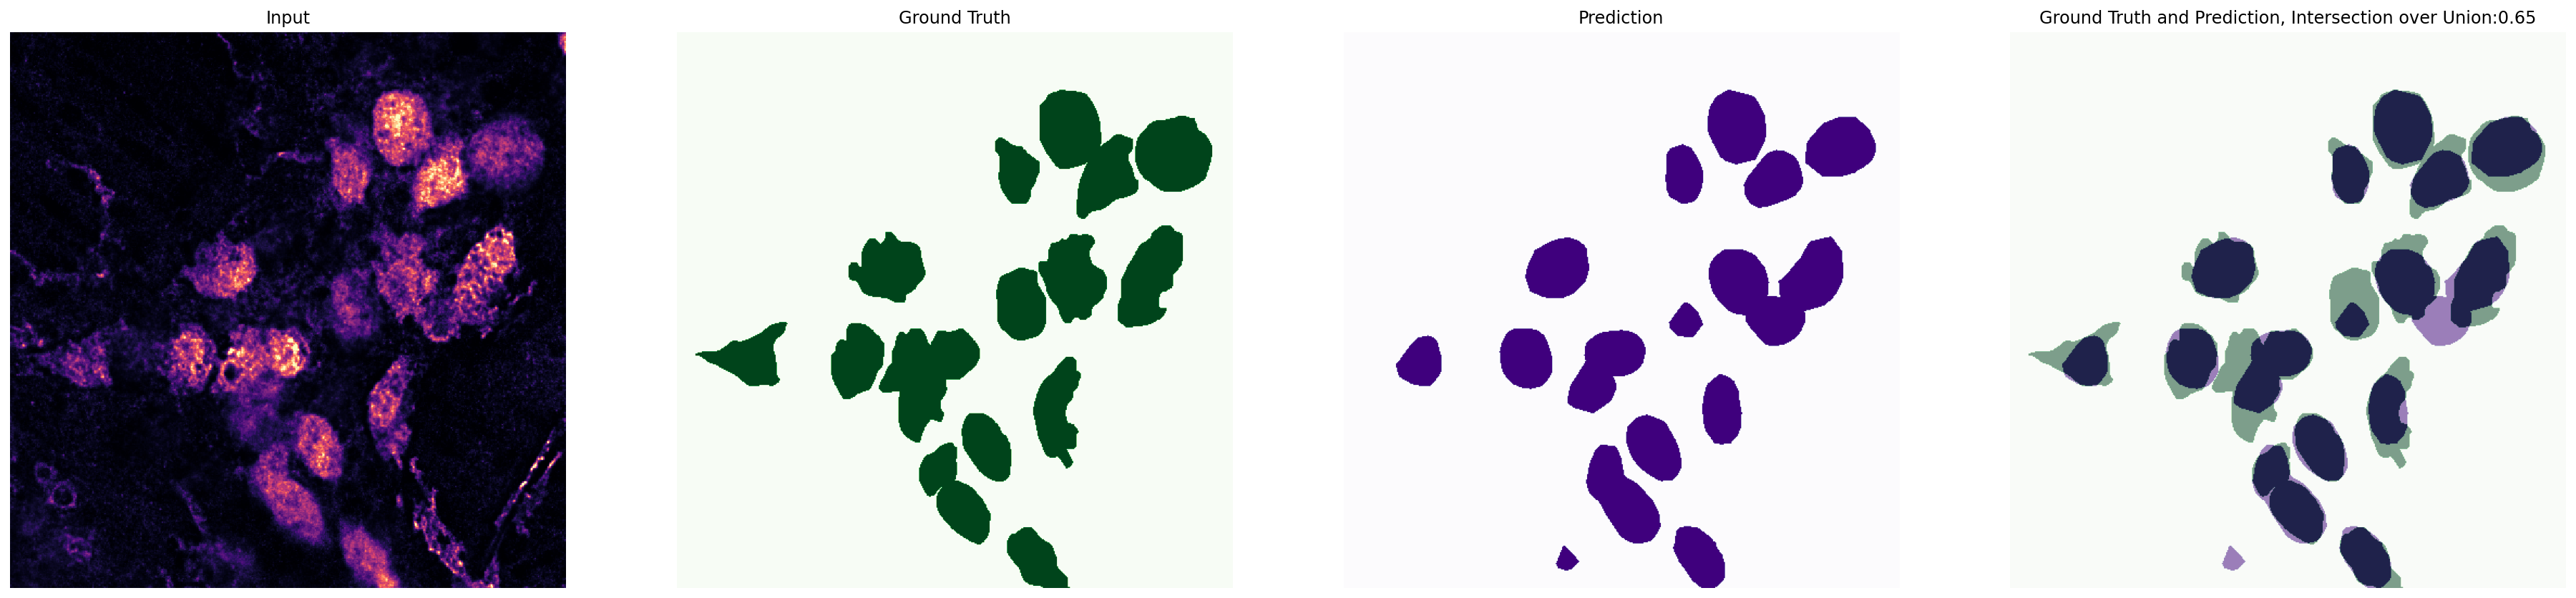

In [14]:
#@markdown ##Give the paths to an image to test the performance of the model with.

import warnings
warnings.filterwarnings("ignore")

Source_QC_folder = "C:\\Users\\fallest\\Documents\\Projects\\Alvaro_StarDist_3D\\DataSet\\Quality_Control_Dataset\\Training_Source" #@param{type:"string"}
Target_QC_folder = "C:\\Users\\fallest\\Documents\\Projects\\Alvaro_StarDist_3D\\DataSet\\Quality_Control_Dataset\\Masks" #@param{type:"string"}

#Here we allow the user to choose the number of tile to be used when predicting the images
#@markdown #####To analyse large image, your images need to be divided into tiles.  Each tile will then be processed independently and re-assembled to generate the final image. "Automatic_number_of_tiles" will search for and use the smallest number of tiles that can be used, at the expanse of your runtime. Alternatively, manually input the number of tiles in each dimension to be used to process your images. 

Automatic_number_of_tiles = True #@param {type:"boolean"}
#@markdown #####If you get an Out of memory (OOM) error when using the "Automatic_number_of_tiles" option, disable it and manually input the values to be used to process your images.  Progressively increases these numbers until the OOM error disappear.
n_tiles_Z =  1#@param {type:"number"}
n_tiles_Y =  1#@param {type:"number"}
n_tiles_X =  1#@param {type:"number"}

if (Automatic_number_of_tiles): 
  n_tilesZYX = None

if not (Automatic_number_of_tiles):
  n_tilesZYX = (n_tiles_Z, n_tiles_Y, n_tiles_X)


#Create a quality control Folder and check if the folder already exist
if os.path.exists(QC_model_path+"/"+QC_model_name+"/Quality Control") == False:
  os.makedirs(QC_model_path+"/"+QC_model_name+"/Quality Control")

if os.path.exists(QC_model_path+"/"+QC_model_name+"/Quality Control/Prediction"):
  shutil.rmtree(QC_model_path+"/"+QC_model_name+"/Quality Control/Prediction")

os.makedirs(QC_model_path+"/"+QC_model_name+"/Quality Control/Prediction")


# Generate predictions from the Source_QC_folder and save them in the QC folder

Source_QC_folder_tif = Source_QC_folder+"/*.tif"


np.random.seed(16)
lbl_cmap = random_label_cmap()
Z = sorted(glob(Source_QC_folder_tif))
Z = list(map(imread,Z))
n_channel = 1 if Z[0].ndim == 2 else Z[0].shape[-1]
axis_norm = (0,1)   # normalize channels independently

print('Number of test dataset found in the folder: '+str(len(Z)))

  
  # axis_norm = (0,1,2) # normalize channels jointly
if n_channel > 1:
  print("Normalizing image channels %s." % ('jointly' if axis_norm is None or 2 in axis_norm else 'independently'))

model = StarDist3D(None, name=QC_model_name, basedir=QC_model_path)

names = [os.path.basename(f) for f in sorted(glob(Source_QC_folder_tif))]

 
# modify the names to suitable form: path_images/image_numberX.tif
  
lenght_of_Z = len(Z)
  
for i in range(lenght_of_Z):
  img = normalize(Z[i], 1,99.8, axis=axis_norm)
  labels, polygons = model.predict_instances(img, n_tiles=n_tilesZYX)
  os.chdir(QC_model_path+"/"+QC_model_name+"/Quality Control/Prediction")
  imsave(names[i], labels, polygons)


# Here we start testing the differences between GT and predicted masks


with open(QC_model_path+"/"+QC_model_name+"/Quality Control/Quality_Control for "+QC_model_name+".csv", "w", newline='') as file:
  writer = csv.writer(file)
  writer.writerow(["image","Prediction v. GT Intersection over Union"])  

  # Initialise the lists 
  filename_list = []
  IoU_score_list = []

  for n in os.listdir(Source_QC_folder):
    if not os.path.isdir(os.path.join(Source_QC_folder,n)):
      print('Running QC on: '+n)
    
      test_input = io.imread(os.path.join(Source_QC_folder,n))
      test_prediction = io.imread(os.path.join(QC_model_path+"/"+QC_model_name+"/Quality Control/Prediction",n))
      test_ground_truth_image = io.imread(os.path.join(Target_QC_folder, n))

#Convert pixel values to 0 or 255
      test_prediction_0_to_255 = test_prediction
      test_prediction_0_to_255[test_prediction_0_to_255>0] = 255

#Convert pixel values to 0 or 255
      test_ground_truth_0_to_255 = test_ground_truth_image
      test_ground_truth_0_to_255[test_ground_truth_0_to_255>0] = 255

# Intersection over Union metric

      intersection = np.logical_and(test_ground_truth_0_to_255, test_prediction_0_to_255)
      union = np.logical_or(test_ground_truth_0_to_255, test_prediction_0_to_255)
      iou_score =  np.sum(intersection) / np.sum(union)
      writer.writerow([n, str(iou_score)])

      print("IoU: "+str(round(iou_score,3)))

      filename_list.append(n)
      IoU_score_list.append(iou_score)



# Table with metrics as dataframe output
pdResults = pd.DataFrame(index = filename_list)
pdResults["IoU"] = IoU_score_list

# Display results
pdResults.head()


# ------------- For display ------------
print('--------------------------------------------------------------')
@interact
def show_QC_results(file=os.listdir(Source_QC_folder)):

  f=plt.figure(figsize=(32,8))

  test_input = io.imread(os.path.join(Source_QC_folder, file))
  test_prediction = io.imread(os.path.join(QC_model_path+"/"+QC_model_name+"/Quality Control/Prediction", file))
  test_ground_truth_image = io.imread(os.path.join(Target_QC_folder, file))

  norm = simple_norm(test_input, percent = 99)
  Image_Z = test_input.shape[0]
  mid_plane = int(Image_Z / 2)+1

  #Convert pixel values to 0 or 255
  test_prediction_0_to_255 = test_prediction
  test_prediction_0_to_255[test_prediction_0_to_255>0] = 255

  #Convert pixel values to 0 or 255
  test_ground_truth_0_to_255 = test_ground_truth_image
  test_ground_truth_0_to_255[test_ground_truth_0_to_255>0] = 255

  #Input
  plt.subplot(1,4,1)
  plt.axis('off')
  plt.imshow(test_input[mid_plane], aspect='equal', norm=norm, cmap='magma',   interpolation='nearest')
  plt.title('Input')

  #Ground-truth
  plt.subplot(1,4,2)
  plt.axis('off')
  plt.imshow(test_ground_truth_0_to_255[mid_plane], aspect='equal', cmap='Greens')
  plt.title('Ground Truth')

  #Prediction
  plt.subplot(1,4,3)
  plt.axis('off')
  plt.imshow(test_prediction_0_to_255[mid_plane], aspect='equal', cmap='Purples')
  plt.title('Prediction')

  #Overlay
  plt.subplot(1,4,4)
  plt.axis('off')
  plt.imshow(test_ground_truth_0_to_255[mid_plane], cmap='Greens')
  plt.imshow(test_prediction_0_to_255[mid_plane], alpha=0.5, cmap='Purples')
  plt.title('Ground Truth and Prediction, Intersection over Union:'+str(round(pdResults.loc[file]["IoU"],3)))
  plt.savefig(full_QC_model_path+'/Quality Control/QC_example_data.png',bbox_inches='tight',pad_inches=0)

 

# Make a pdf summary of the QC results
qc_pdf_export()


# **6. Using the trained model**

---

<font size = 4>In this section the unseen data is processed using the trained model (in section 4). First, your unseen images are uploaded and prepared for prediction. After that your trained model from section 4 is activated and finally saved into your Google Drive.

## **6.1. Generate prediction(s) from unseen dataset**
---

<font size = 4>The current trained model (from section 4.3) can now be used to process images. If an older model needs to be used, please untick the **Use_the_current_trained_model** box and enter the name and path of the model to use. Predicted output images are saved in your **Prediction_folder** folder as restored image stacks (ImageJ-compatible TIFF images).

<font size = 4>**`Data_folder`:** This folder should contains the images that you want to predict using the network that you trained.

<font size = 4>**`Result_folder`:** This folder will contain the predicted output ROI.

<font size = 4>**`Data_type`:** Please indicate if the images you want to predict are single images or stacks




Using current trained network
The Alvaro_Cells_3D network will be used.
Normalizing image channels independently.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.694515, nms_thresh=0.3.
The mid-plane image is displayed below.
--------------------------------------------------------------


interactive(children=(Dropdown(description='file', options=('Image2_Crop1.tif', 'Image2_Crop2.tif', 'Image2_Cr…

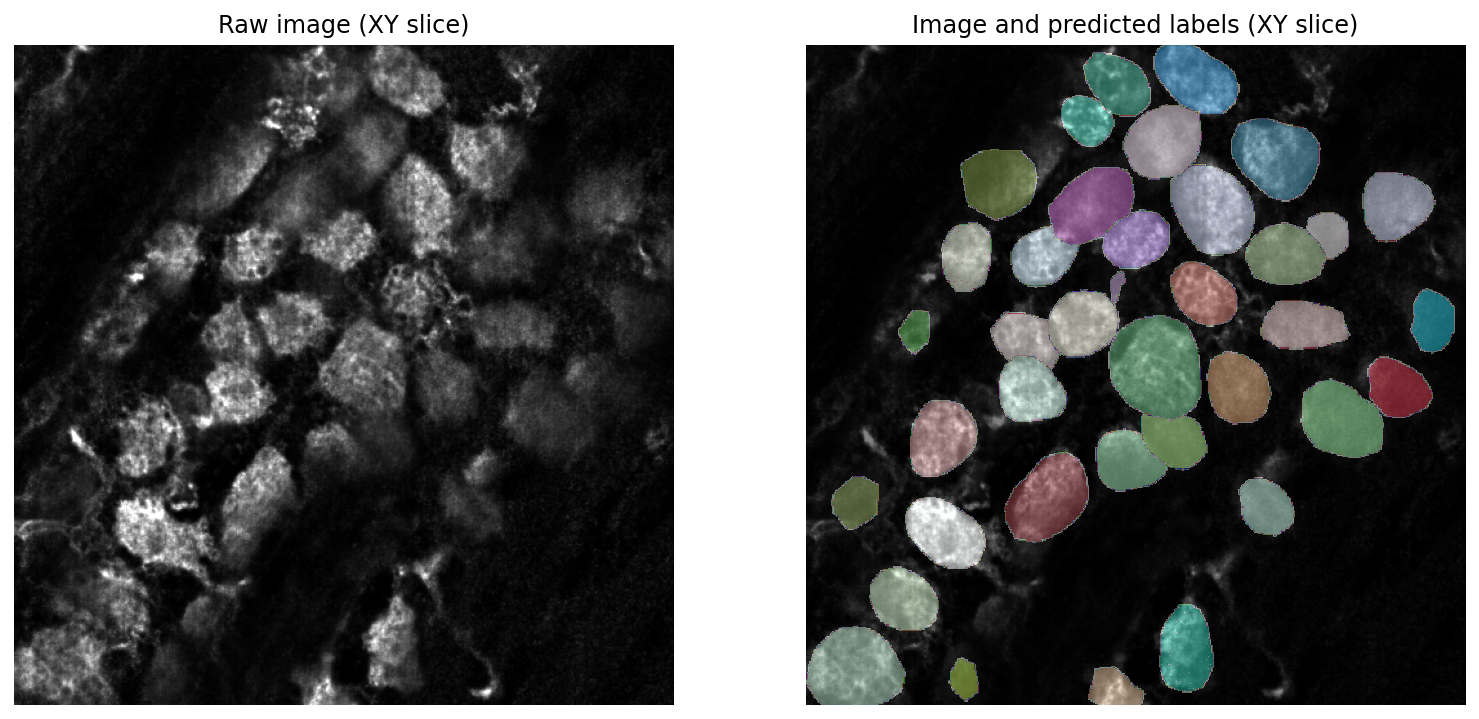

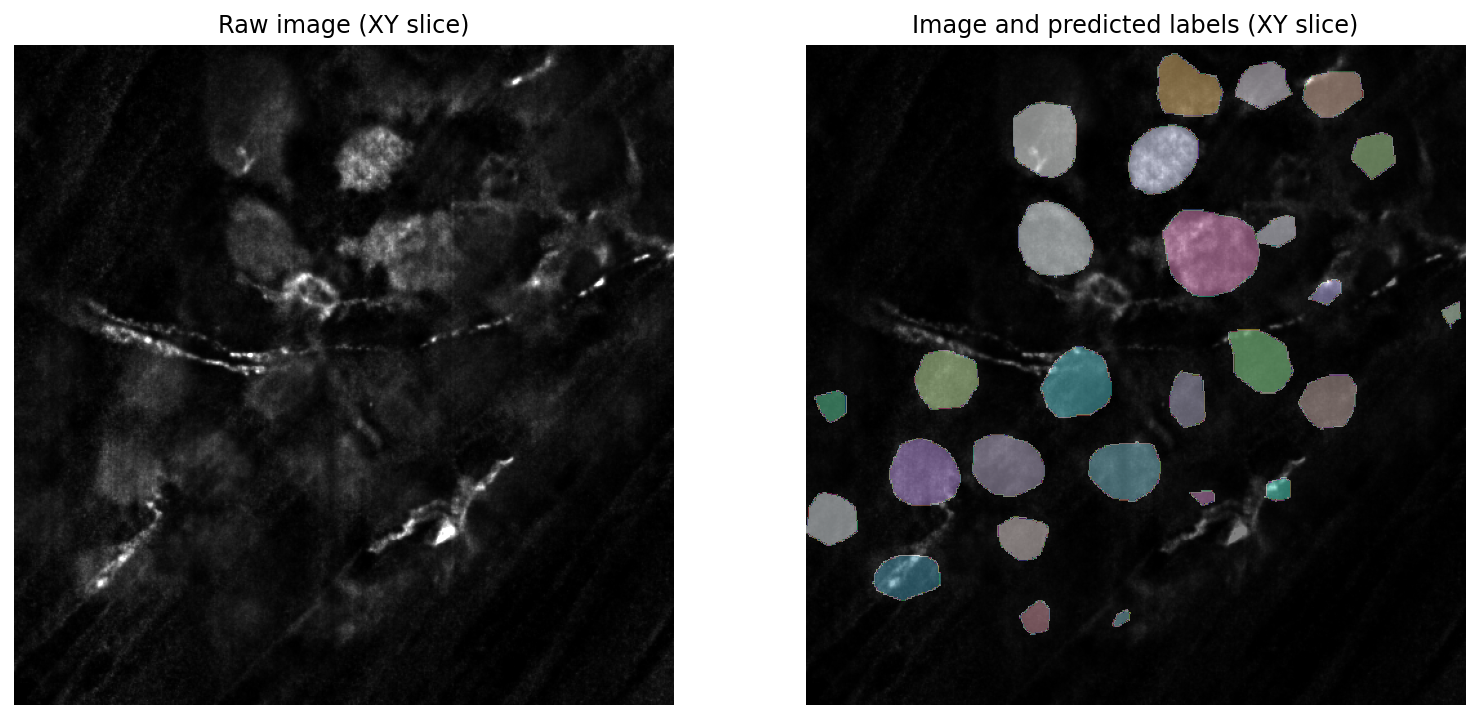

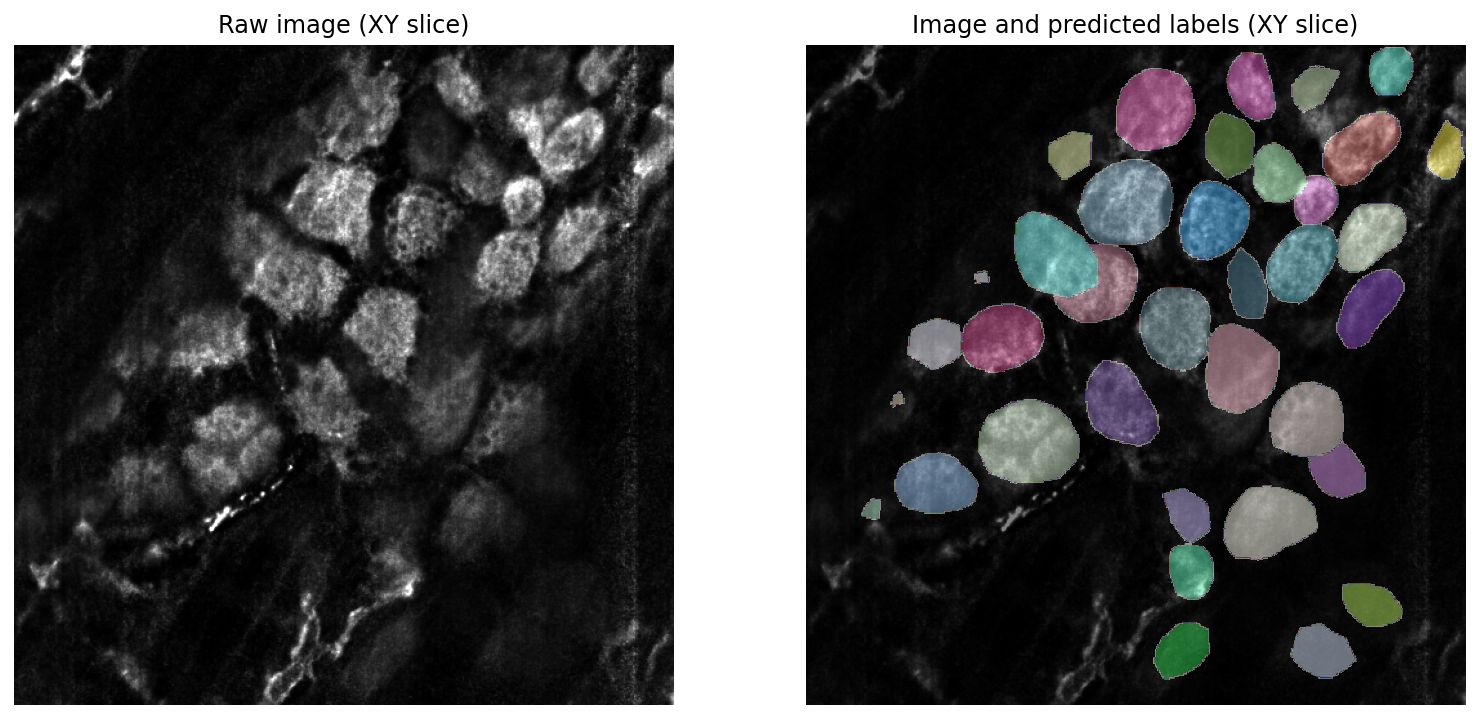

In [17]:
from PIL import Image

#@markdown ### Provide the path to your dataset and to the folder where the prediction will be saved (Result folder), then play the cell to predict output on your unseen images.

Data_folder = "C:\\Users\\fallest\\Documents\\Projects\\Alvaro_StarDist_3D\\DataSet\\Unseen_Data\\Originals" #@param {type:"string"}
#test_dataset = Data_folder

Results_folder = "C:\\Users\\fallest\\Documents\\Projects\\Alvaro_StarDist_3D\\DataSet\\Unseen_Data\\Results" #@param {type:"string"}
#results = results_folder


# model name and path
#@markdown ###Do you want to use the current trained model?
Use_the_current_trained_model = True #@param {type:"boolean"}


#@markdown ###If not, please provide the path to the model folder:

Prediction_model_folder = "" #@param {type:"string"}

#Here we find the loaded model name and parent path
Prediction_model_name = os.path.basename(Prediction_model_folder)
Prediction_model_path = os.path.dirname(Prediction_model_folder)

#Here we allow the user to choose the number of tile to be used when predicting the images
#@markdown #####To analyse large image, your images need to be divided into tiles.  Each tile will then be processed independently and re-assembled to generate the final image. "Automatic_number_of_tiles" will search for and use the smallest number of tiles that can be used, at the expanse of your runtime. Alternatively, manually input the number of tiles in each dimension to be used to process your images. 

Automatic_number_of_tiles = True #@param {type:"boolean"}
#@markdown #####If you get an Out of memory (OOM) error when using the "Automatic_number_of_tiles" option, disable it and manually input the values to be used to process your images.  Progressively increases these numbers until the OOM error disappear.
n_tiles_Z =  1#@param {type:"number"}
n_tiles_Y =  1#@param {type:"number"}
n_tiles_X =  1#@param {type:"number"}

if (Automatic_number_of_tiles): 
  n_tilesZYX = None

if not (Automatic_number_of_tiles):
  n_tilesZYX = (n_tiles_Z, n_tiles_Y, n_tiles_X)


if (Use_the_current_trained_model): 
  print("Using current trained network")
  Prediction_model_name = model_name
  Prediction_model_path = model_path

full_Prediction_model_path = Prediction_model_path+'/'+Prediction_model_name+'/'
if os.path.exists(full_Prediction_model_path):
  print("The "+Prediction_model_name+" network will be used.")
else:
  W  = '\033[0m'  # white (normal)
  R  = '\033[31m' # red
  print(R+'!! WARNING: The chosen model does not exist !!'+W)
  print('Please make sure you provide a valid model path and model name before proceeding further.')


#single images
#testDATA = test_dataset
Dataset = Data_folder+"/*.tif"


np.random.seed(16)
lbl_cmap = random_label_cmap()
X = sorted(glob(Dataset))
X = list(map(imread,X))
n_channel = 1 if X[0].ndim == 2 else X[0].shape[-1]
axis_norm = (0,1)   # normalize channels independently
  
# axis_norm = (0,1,2) # normalize channels jointly
if n_channel > 1:
  print("Normalizing image channels %s." % ('jointly' if axis_norm is None or 2 in axis_norm else 'independently'))
model = StarDist3D(None, name=Prediction_model_name, basedir=Prediction_model_path)
 
#Sorting and mapping original test dataset
X = sorted(glob(Dataset))
X = list(map(imread,X))
names = [os.path.basename(f) for f in sorted(glob(Dataset))]

# modify the names to suitable form: path_images/image_numberX.tif
FILEnames=[]
for m in names:
  m=Results_folder+'/'+m
  FILEnames.append(m)

  # Predictions folder
lenght_of_X = len(X)
for i in range(lenght_of_X):
  img = normalize(X[i], 1,99.8, axis=axis_norm)
  labels, polygons = model.predict_instances(img, n_tiles=n_tilesZYX)
  
# Save the predicted mask in the result folder
  os.chdir(Results_folder)
  imsave(FILEnames[i], labels, polygons)


print("The mid-plane image is displayed below.")
# ------------- For display ------------
print('--------------------------------------------------------------')
@interact
def show_QC_results(file=os.listdir(Data_folder)):
  plt.figure(figsize=(13,10))

  img = imread(os.path.join(Data_folder, file))
  img = normalize(img, 1,99.8, axis=axis_norm)
  labels = imread(os.path.join(Results_folder, file))
  z = max(0, img.shape[0] // 2 - 5)

  plt.subplot(121)
  plt.imshow((img if img.ndim==3 else img[...,:3])[z], clim=(0,1), cmap='gray')
  plt.title('Raw image (XY slice)')
  plt.axis('off')
  plt.subplot(122)
  plt.imshow((img if img.ndim==3 else img[...,:3])[z], clim=(0,1), cmap='gray')
  plt.imshow(labels[z], cmap=lbl_cmap, alpha=0.5)
  plt.title('Image and predicted labels (XY slice)')
  plt.axis('off');



## **6.2. Download your predictions**
---

<font size = 4>**Store your data** and ALL its results elsewhere by downloading it from Google Drive and after that clean the original folder tree (datasets, results, trained model etc.) if you plan to train or use new networks. Please note that the notebook will otherwise **OVERWRITE** all files which have the same name.

# **7. Version log**
---
<font size = 4>**v1.13**:  

*  StarDist is now downgraded to v 0.6.2 to ensure compatibility with previously trained models.

*   This version now includes an automatic restart allowing to set the h5py library to v2.10.
*  The section 1 and 2 are now swapped for better export of *requirements.txt*.
This version also now includes built-in version check and the version log that 

*   This version also now includes built-in version check and the version log that you're reading now.







#**Thank you for using StarDist 3D!**